## In this step-by-step tutorial you will:

* Download and install Python SciPy and get the most useful package for machine learning in Python.
* Load a dataset and understand it’s structure using statistical summaries and data visualization.
* Create 6 machine learning models, pick the best and build confidence that the accuracy is reliable.

If you are a machine learning beginner and looking to finally get started using Python, this tutorial was designed for you.
http://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [ ]:
Installere anaconda.

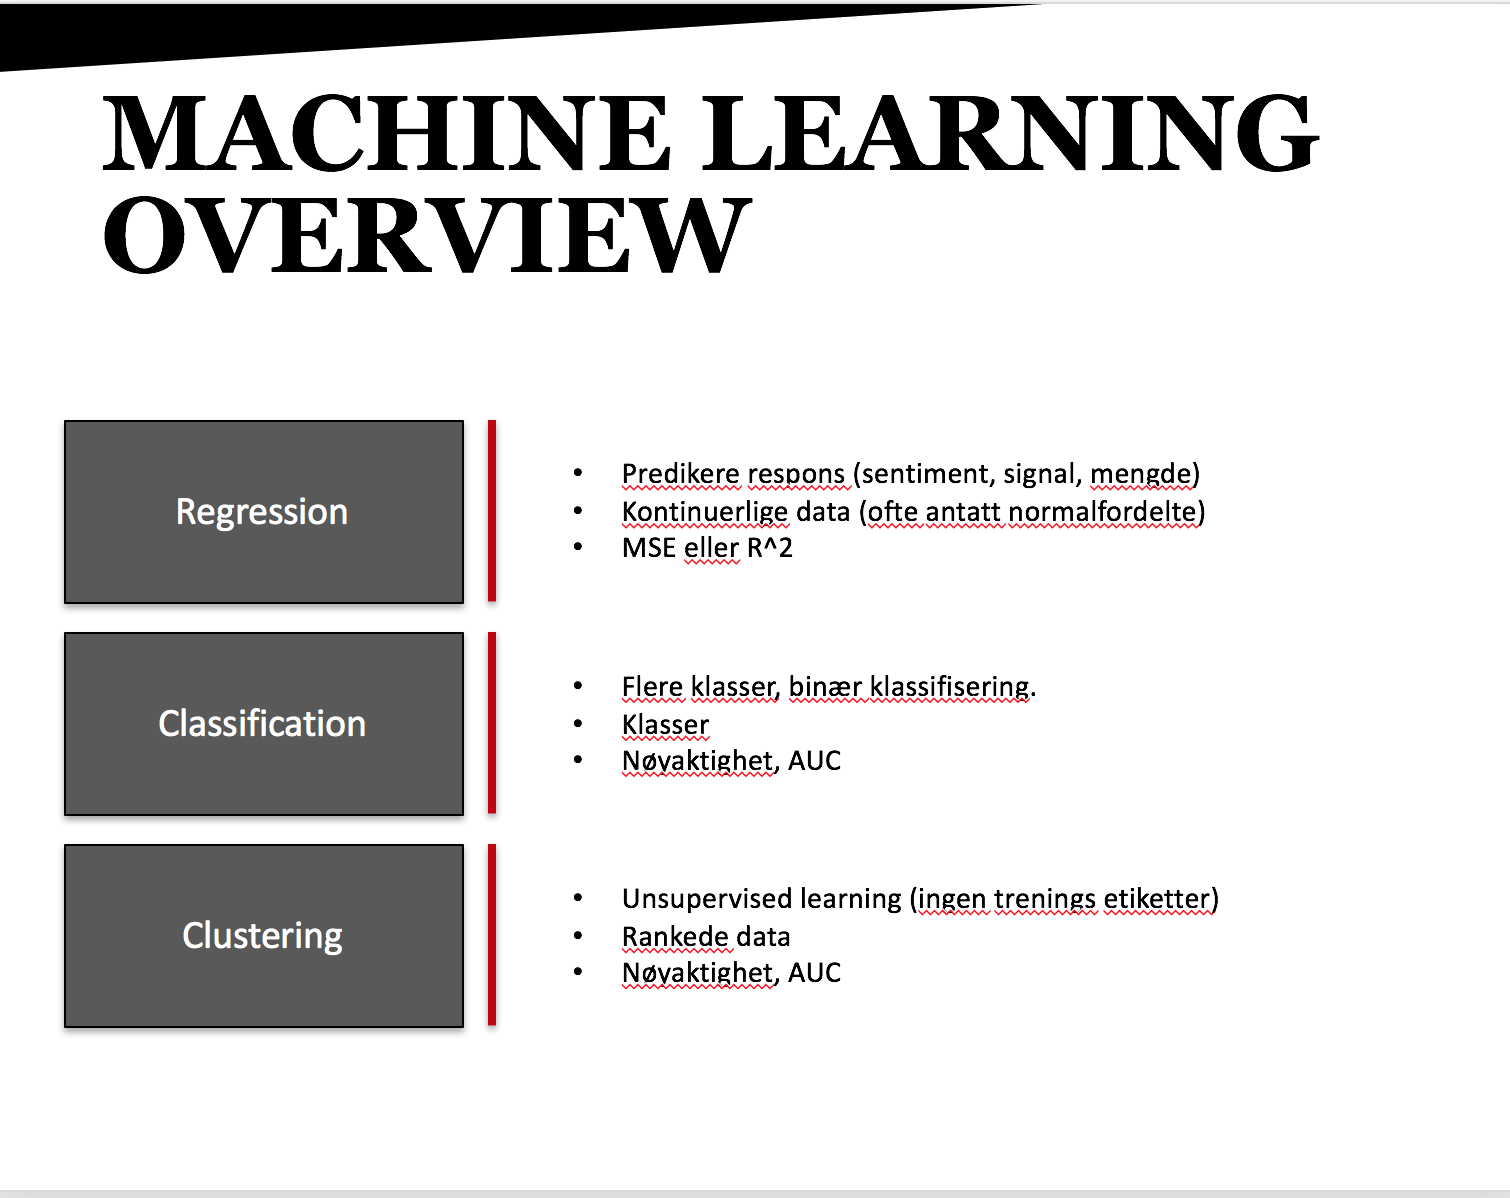

In [1]:
from IPython.display import Image
Image("ML.png")

## 1. How Do You Start Machine Learning in Python?

The best way to learn machine learning is by designing and completing small projects.

Python Can Be Intimidating When Getting Started

Python is a popular and powerful interpreted language. Unlike R, Python is a complete language and platform that you can use for both research and development and developing production systems.

There are also a lot of modules and libraries to choose from, providing multiple ways to do each task. It can feel overwhelming.

The best way to get started using Python for machine learning is to complete a project.

It will force you to install and start the Python interpreter (at the very least).
It will given you a bird’s eye view of how to step through a small project.
It will give you confidence, maybe to go on to your own small projects.
Beginners Need A Small End-to-End Project

Books and courses are frustrating. They give you lots of recipes and snippets, but you never get to see how they all fit together.

When you are applying machine learning to your own datasets, you are working on a project.

A machine learning project may not be linear, but it has a number of well known steps:

1. Define Problem.
2. Prepare Data.
3. Evaluate Algorithms.
4. Improve Results.
5. Present Results.


## Hello World of Machine Learning

The best small project to start with on a new tool is the classification of iris flowers (e.g. the iris dataset).https://archive.ics.uci.edu/ml/datasets/Iris

This is a good project because it is so well understood.

Attributes are numeric so you have to figure out how to load and handle data.
It is a classification problem, allowing you to practice with perhaps an easier type of supervised learning algorithm.
It is a multi-class classification problem (multi-nominal) that may require some specialized handling.
It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page).
All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started.
Let’s get started with your hello world machine learning project in Python.

## 1 Import libraries

First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

In [2]:

# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline
print("loaded all libraries successfully")

loaded all libraries successfully


## 2. Load The Data

We are going to use the iris flowers dataset. This dataset is famous because it is used as the “hello world” dataset in machine learning and statistics by pretty much everyone.

The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.

You can learn more about this dataset on Wikipedia.

In this step we are going to load the iris data from CSV file URL.

### 2.2 Load Dataset

We can load the data directly from the UCI Machine Learning repository.

We are using pandas to load the data. We will also use pandas next to explore the data both with descriptive statistics and data visualization.

Note that we are specifying the names of each column when loading the data. This will help later when we explore the data.

In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)
print("loaded the iris dataset")

loaded the iris dataset


## 3. Summarize the Dataset

Now it is time to take a look at the data.

In this step we are going to take a look at the data a few different ways:

1. Dimensions of the dataset.
2. Peek at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.

Don’t worry, each look at the data is one command. These are 6. useful commands that you can use again and again on future projects.

### 3.1 Dimensions of Dataset

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.



In [4]:


# shape
print(dataset.shape)
# You should see 150 instances and 5 attributes:

(150, 5)


### 3.2 Peek at the Data

It is also always a good idea to actually eyeball your data.

In [5]:
# head
print(dataset.head(20))
#You should see the first 20 rows of the data:

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

### 3.3 Statistical Summary

Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.

In [6]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.



### 3.4 Class Distribution

Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [7]:

# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


We can see that each class has the same number of instances (50 or 33% of the dataset).



## 4. Data Visualization

We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

Univariate plots to better understand each attribute.
Multivariate plots to better understand the relationships between attributes.

### 4.1 Univariate Plots

We start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, we can create box and whisker plots of each.

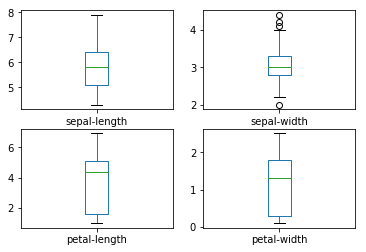

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

This gives us a much clearer idea of the distribution of the input attributes:

We can also create a histogram of each input variable to get an idea of the distribution.



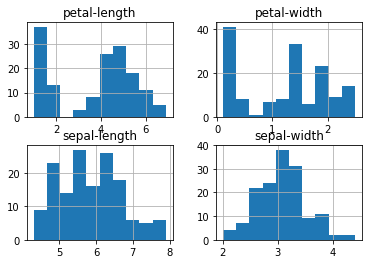

In [9]:


# histograms
dataset.hist()
plt.show()



It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.



### 4.2 Multivariate Plots

Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

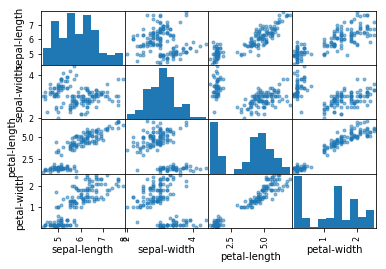

In [10]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

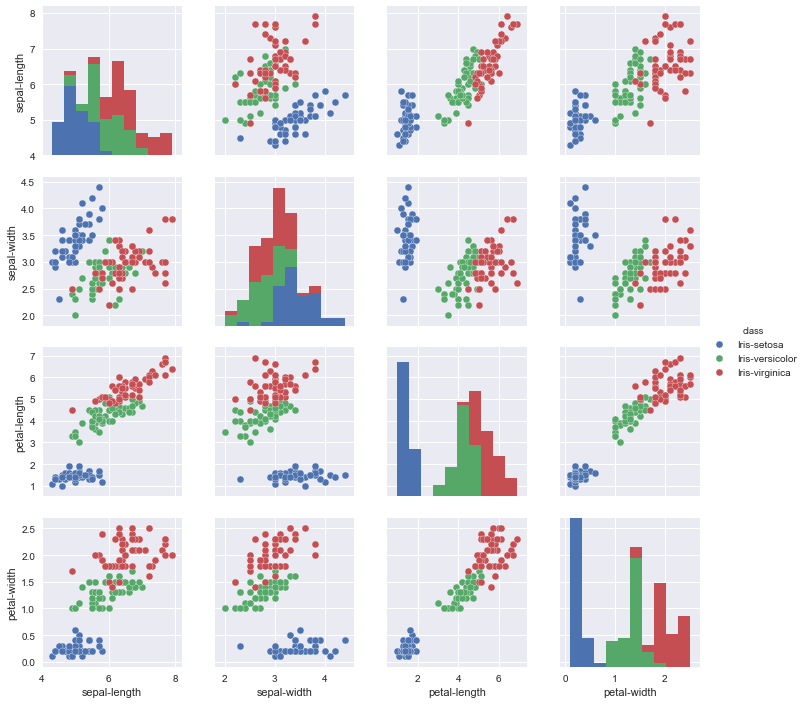

In [11]:
%matplotlib inline
import seaborn as sns#; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset, hue="class")

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

## 5. Evaluate Some Algorithms



Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

1. Separate out a validation dataset.
2. Set-up the test harness to use 10-fold cross validation.
3. Build 5 different models to predict species from flower measurements
4. Select the best model.


### 5.1 Create a Validation Dataset

We need to know that the model we created is any good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.



In [12]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
print(X.shape)
print(X[0:2])
print(Y.shape)
print(Y[0:2])


(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]]
(150,)
['Iris-setosa' 'Iris-setosa']


In [13]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.



### 5.2 Test Harness



We will use 10-fold cross validation to estimate accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.



In [14]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.



## 5.3 Build Models

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 6 different algorithms:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).
This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

Let’s build and evaluate our five models:

In [15]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


### 5.3 Select Best Model

We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

Running the example above, we get the following raw results:

We can see that it looks like KNN has the largest estimated accuracy score.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

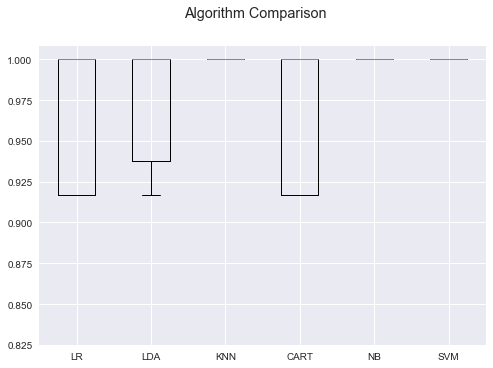

In [17]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 6. Make Predictions

The KNN algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [19]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

You Can Do Machine Learning in Python

Work through the tutorial above. It will take you 5-to-10 minutes, max!

You do not need to understand everything. (at least not right now) Your goal is to run through the tutorial end-to-end and get a result. You do not need to understand everything on the first pass. List down your questions as you go. Make heavy use of the help(“FunctionName”) help syntax in Python to learn about all of the functions that you’re using.

You do not need to know how the algorithms work. It is important to know about the limitations and how to configure machine learning algorithms. But learning about algorithms can come later. You need to build up this algorithm knowledge slowly over a long period of time. Today, start off by getting comfortable with the platform.

You do not need to be a Python programmer. The syntax of the Python language can be intuitive if you are new to it. Just like other languages, focus on function calls (e.g. function()) and assignments (e.g. a = “b”). This will get you most of the way. You are a developer, you know how to pick up the basics of a language real fast. Just get started and dive into the details later.

You do not need to be a machine learning expert. You can learn about the benefits and limitations of various algorithms later, and there are plenty of posts that you can read later to brush up on the steps of a machine learning project and the importance of evaluating accuracy using cross validation.

What about other steps in a machine learning project. We did not cover all of the steps in a machine learning project because this is your first project and we need to focus on the key steps. Namely, loading data, looking at the data, evaluating some algorithms and making some predictions. In later tutorials we can look at other data preparation and result improvement tasks.

# Install new package
https://github.com/rasbt/mlxtend

pip install mlxtend  

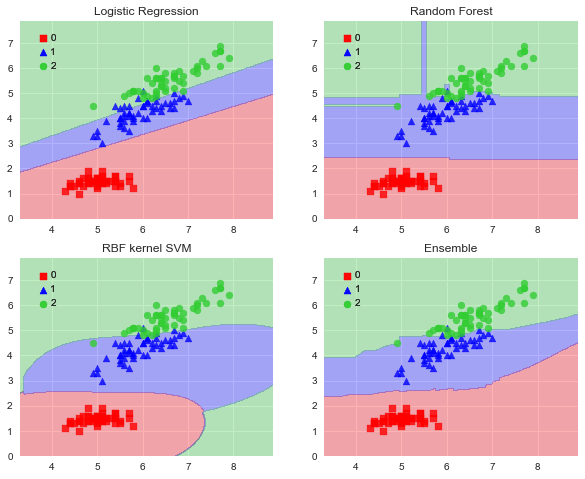

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [62]:
#check validation of the other classifiers, do some of them do a better job?

In [63]:
#why dont k nearest neighbor perform the best? or why does it?

In [64]:
#plot the decision surface, what differentiate the different models?

In [65]:
#try do combine some of the classifiers, which ones perform better? does the ensamble improve?

In [66]:
#try to do add noise to the training data, this creates more training data, does the model improve?